## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 006B

In [1]:
import os
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Fibonacci:
    def __init__(self):
        self.sequence = [0, 1]
    def __getitem__(self, key):
        if isinstance(key, int):
            stop = key + 1
        elif isinstance(key, slice):
            stop = key.stop
        while len(self.sequence) < stop:
            self.sequence.append(self.sequence[-2] + self.sequence[-1])
        return self.sequence[key]
f = Fibonacci()
t=20
s=3
e=s+t
trials_list = f[s:e]
print (trials_list)

[2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711]


In [3]:
# Create a list of the number of coin tosses ("Bernoulli Trials")
number_of_trials = trials_list

# Fix seed for random state for reproducibility
np.random.seed(7)

# Conduct 10000 coin tosses and output into a list of 0s and 1s with 0 for a tail and 1 for a head
data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])
#print(data.shape)

# Discretise the x-axis into 100 separate plotting points
x = np.linspace(0, 1, 100)

### Loops over the number_of_trials list to continually add extra coin toss data after every cycle. 
### For each new set of data, you modify the overall prior belief to form a new posterior. 
### This is known as a Beta-Binomial model.

In [4]:
for i, N in enumerate(number_of_trials):
    # Sum the total number of heads for each Bayesian update
    heads = float(data[:N].sum())
    tails = float(N - heads)
    if N == 0:
        p = 0.0
    else:
        p = round((heads/N)*100,3)
    print('Perform Test (%03d): %6d trials, %6d heads, %6d tails -> %7.4f %%' % ((i+1), N, heads, tails, p))

Perform Test (001):      2 trials,      1 heads,      1 tails -> 50.0000 %
Perform Test (002):      3 trials,      1 heads,      2 tails -> 33.3330 %
Perform Test (003):      5 trials,      3 heads,      2 tails -> 60.0000 %
Perform Test (004):      8 trials,      5 heads,      3 tails -> 62.5000 %
Perform Test (005):     13 trials,      7 heads,      6 tails -> 53.8460 %
Perform Test (006):     21 trials,     10 heads,     11 tails -> 47.6190 %
Perform Test (007):     34 trials,     16 heads,     18 tails -> 47.0590 %
Perform Test (008):     55 trials,     25 heads,     30 tails -> 45.4550 %
Perform Test (009):     89 trials,     41 heads,     48 tails -> 46.0670 %
Perform Test (010):    144 trials,     71 heads,     73 tails -> 49.3060 %
Perform Test (011):    233 trials,    114 heads,    119 tails -> 48.9270 %
Perform Test (012):    377 trials,    183 heads,    194 tails -> 48.5410 %
Perform Test (013):    610 trials,    292 heads,    318 tails -> 47.8690 %
Perform Test (014):    98

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

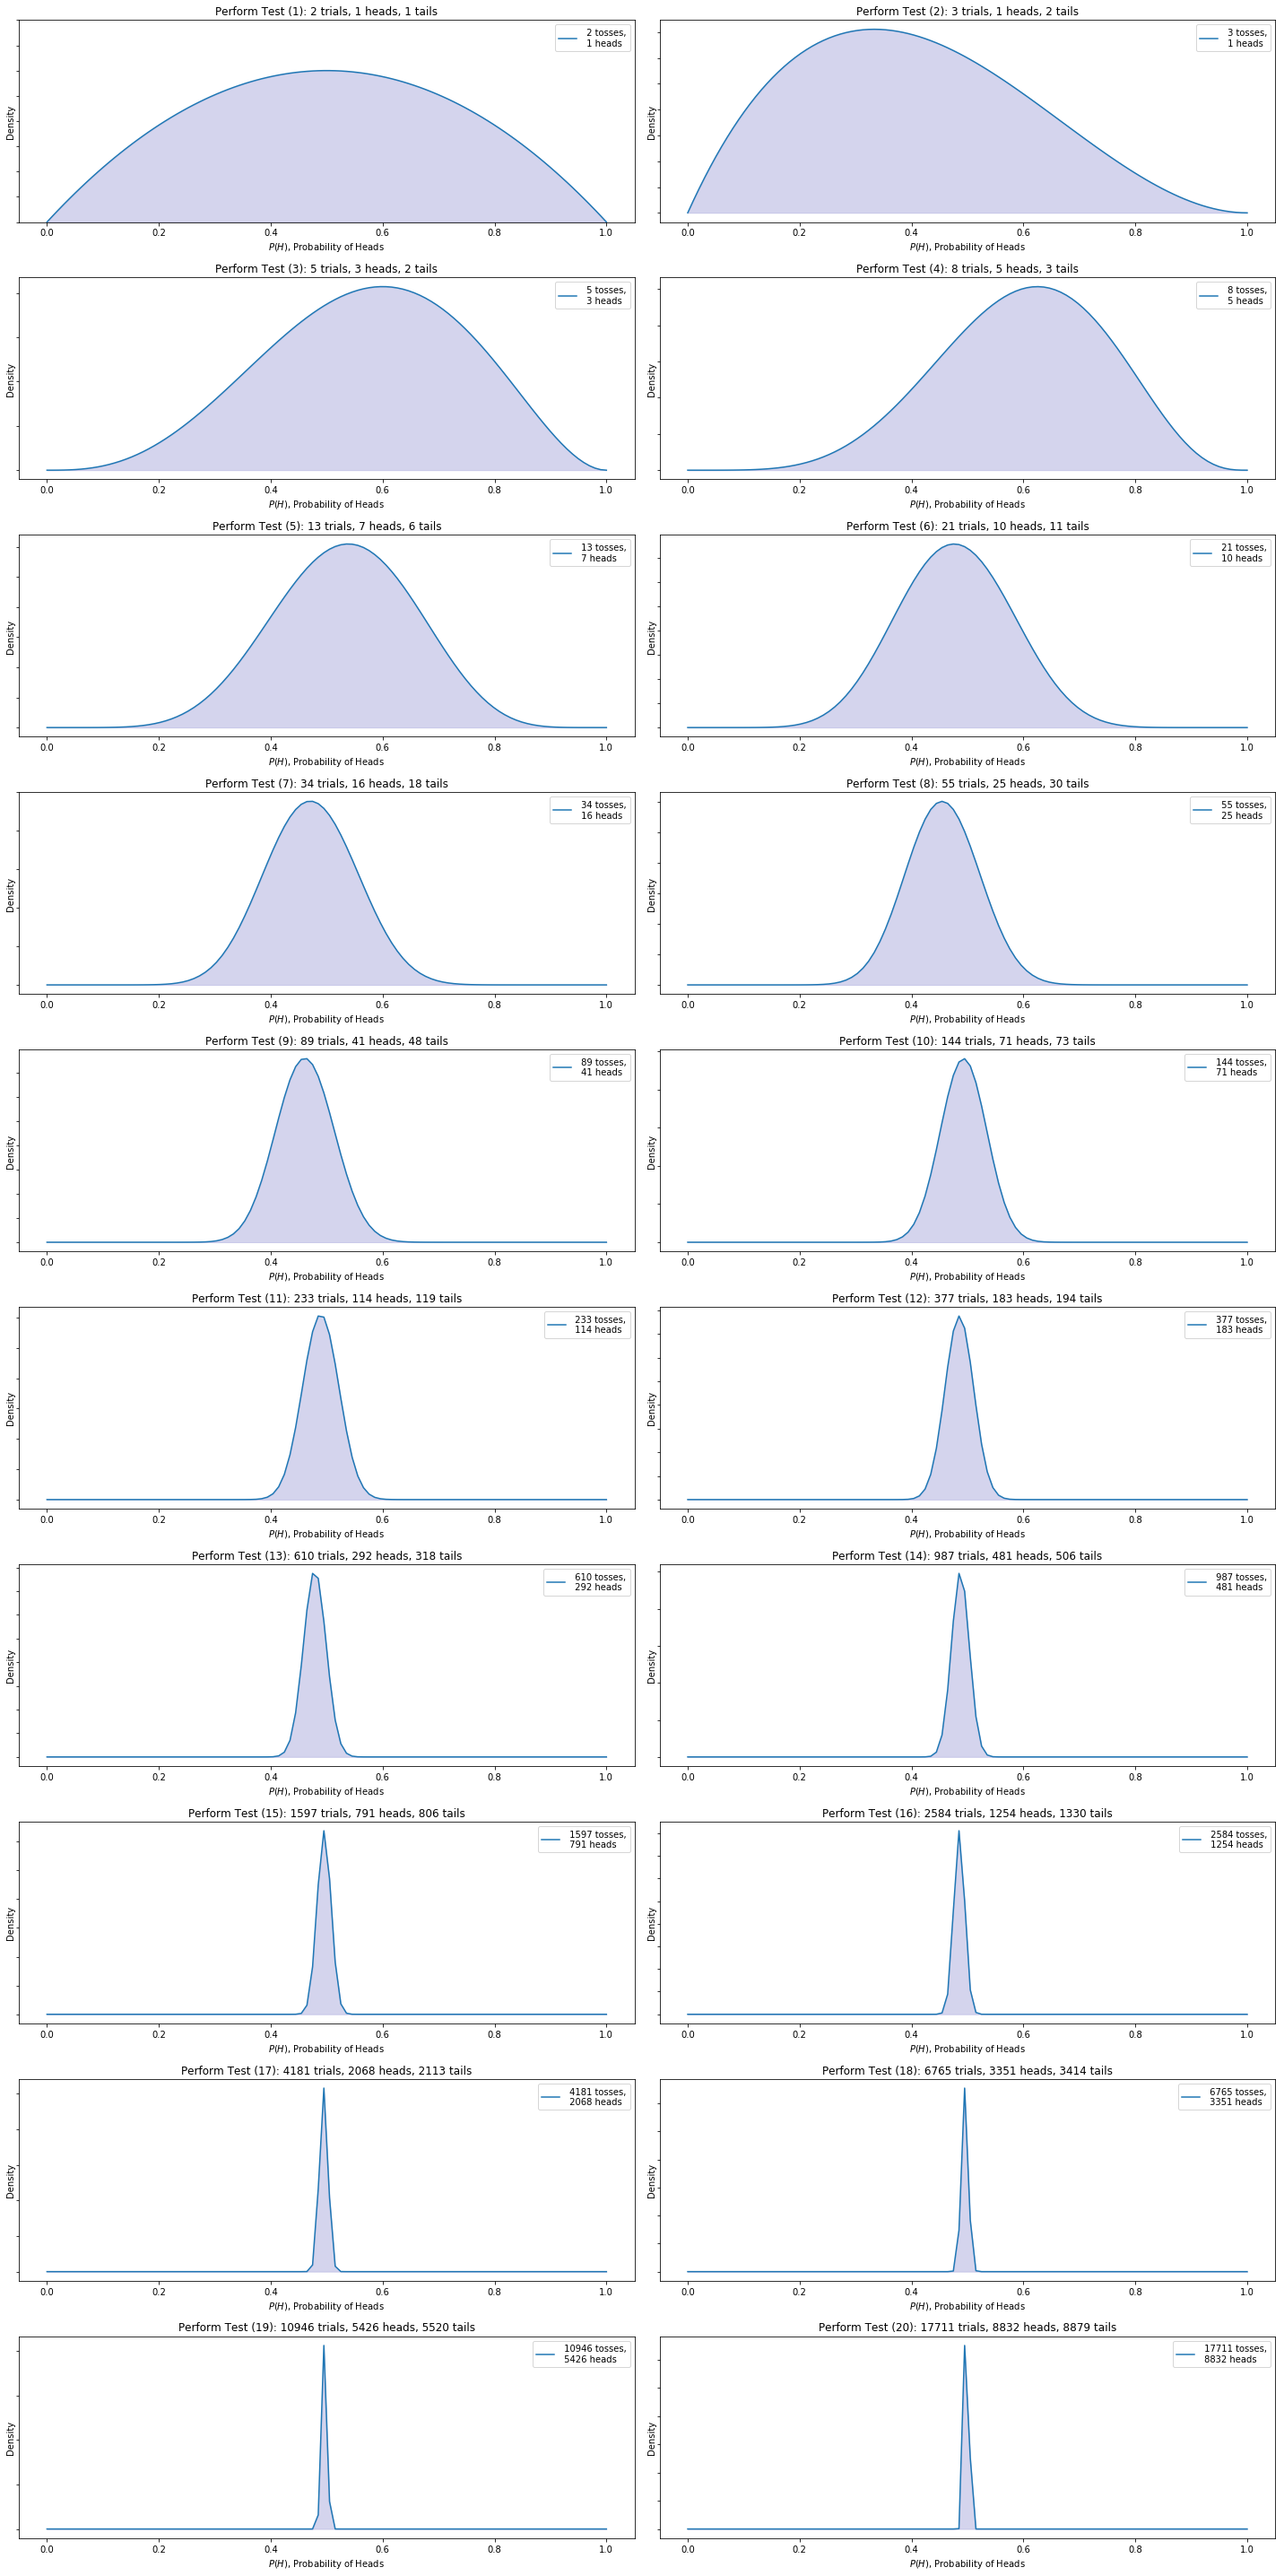

In [6]:
fig=plt.figure(figsize=(t, t*2))

for i, N in enumerate(number_of_trials):
    # Sum the total number of heads for each Bayesian update
    heads = data[:N].sum()
    tails = N - heads

    # Create an axes subplot for each Bayesian update 
    ax = plt.subplot(len(number_of_trials) / 2, 2, i + 1)
    ax.set_title('Perform Test (%d): %s trials, %s heads, %s tails' % ((i+1), N, heads,tails))

    # Add labels to both axes and hide labels on y-axis
    plt.xlabel('$P(H)$, Probability of Heads')
    plt.ylabel('Density')
    if i == 0:
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)

    # Create and plot a  Beta distribution to show the posterior belief in fairness of the coin.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label=" %d tosses,\n %d heads" % (N, heads))
    plt.legend(loc='best')
    plt.fill_between(x, 0, y, color='#aaaadd', alpha=0.5)

# Expand plot to fill the full width/height and display results
plt.tight_layout()
plt.show()


In [7]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
graphName = 'Chapter-005-Example-006B-01.jpg'
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05',graphName])
fig.savefig(imagename, bbox_inches='tight')


C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Done

In [8]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-15 10:13:08.942218
